# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


Bad key "text.kerning_factor" on line 4 in
C:\Users\reeve\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [4]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [5]:
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [6]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [19]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    fig=plt.figure()
    housing_mean = sfo_data.groupby('year').mean()
    housing_mean['housing_units'].plot(title="Average Housing Units by Year", kind='bar')
    min_mean = housing_mean['housing_units'].min()
    max_mean = housing_mean['housing_units'].max()
    std_dev = housing_mean['housing_units'].std()
    plt.ylim([min_mean - std_dev, max_mean + std_dev])
    return pn.pane.Matplotlib(fig)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    fig=plt.figure()
    housing_mean = sfo_data.groupby('year').mean()
    housing_mean['gross_rent'].plot(title="Average Gross Rent per Year", kind='line')
    plt.xlabel('Year')
    plt.ylabel('Price')
    return pn.pane.Matplotlib(fig)


def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    fig=plt.figure()
    housing_mean = sfo_data.groupby('year').mean()
    housing_mean['sale_price_sqr_foot'].plot(title="Average Sale Price per Year", kind='line')
    plt.xlabel('Year')
    plt.ylabel('Price')
    return pn.pane.Matplotlib(fig)

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    fig=plt.figure()
    neighborhood_mean = sfo_data.groupby(['year', 'neighborhood']).mean()
    neighborhood_mean_plot=neighborhood_mean.hvplot.line(x="year", y="sale_price_sqr_foot", xlabel="Year", ylabel="Sale Price per Square Foot", rot=90, groupby='neighborhood')
    return neighborhood_mean_plot

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # YOUR CODE HERE
    fig=plt.figure()
    sales_mean_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
    sales_mean_neighborhood_plot = sales_mean_neighborhood.head(10).hvplot.bar(x="neighborhood", y="sale_price_sqr_foot", xlabel="Neighborhood", ylabel="Sale Price per Square Foot", rot=90, height=400)
    return sales_mean_neighborhood_plot

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!
    fig=plt.figure()
    top_10_exp = sfo_data.groupby(['year', 'neighborhood']).mean()
    top_10_exp_plot = px.parallel_coordinates(top_10_exp.reset_index(), color='sale_price_sqr_foot', color_continuous_scale=px.colors.sequential.Inferno)
    return top_10_exp_plot

def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    fig=plt.figure()
    top_10_exp = sfo_data.groupby(['year', 'neighborhood']).mean()
    top_10_exp_plot = px.parallel_categories(top_10_exp.reset_index(), color='sale_price_sqr_foot', color_continuous_scale=px.colors.sequential.Inferno)
    return top_10_exp_plot

def neighborhood_map():
    """Neighborhood Map"""
    
    # YOUR CODE HERE!
    
    fig=plt.figure()
    housing_mean = df_neighborhood_locations.groupby('Neighborhood').mean()
    # new_join = pd.merge(housing_mean.reset_index(), df_neighborhood_locations, left_on='Neighborhood', right_on='Neighborhood')
    px.set_mapbox_access_token(mapbox_token)
    neighborhood_map=px.scatter_mapbox(housing_mean, lat='Lat', lon='Lon')
    # neighborhood_map.show()
    # return neighborhood_map
    plotly_panel = pn.pane.Plotly(neighborhood_map)
    plotly_panel._updates = True
    return plotly_panel


In [20]:
housing_mean = df_neighborhood_locations.groupby('Neighborhood').mean()
# new_join = pd.merge(housing_mean.reset_index(), df_neighborhood_locations, left_on='Neighborhood', right_on='Neighborhood')
new_join.head()

,Neighborhood,Lat_x,Lon_x,Lat_y,Lon_y
0,Alamo Square,37.791012,-122.402100,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451,37.779598,-122.443451
2,Bayview,37.734670,-122.401060,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050,37.728630,-122.443050


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [26]:
fig=plt.figure()
neighborhood_mean = sfo_data.groupby(['year', 'neighborhood']).mean()
neighborhood_mean.hvplot.line(x="year", y="sale_price_sqr_foot", xlabel="Year", ylabel="Sale Price per Square Foot", rot=90, groupby='neighborhood')


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

<Figure size 432x288 with 0 Axes>

In [22]:
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


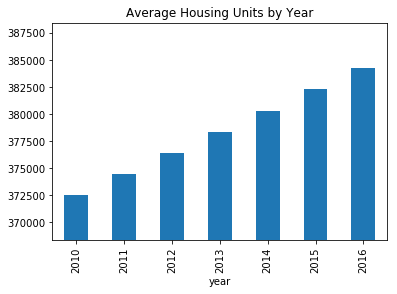

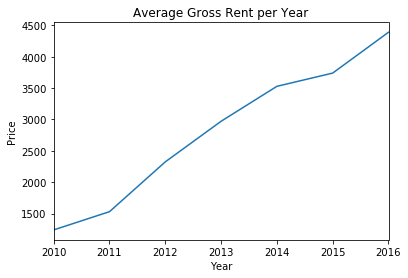

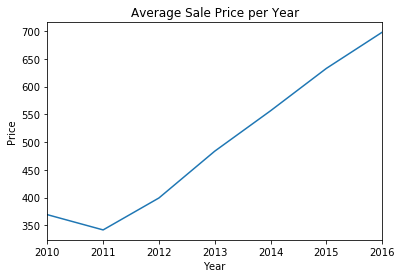

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
# YOUR CODE HERE!
panel=pn.Tabs(("First Page", #pn.Tabs(("First Tab", pane), ("Second Tab", pane))
    pn.Column(
        pn.Row(housing_units_per_year(), average_gross_rent()), # pn.Row(pane, pane)
        # pn.Row(housing_units_per_year(), average_gross_rent()),
        pn.Row(average_sales_price()),
        pn.Row(average_price_by_neighborhood()),
        pn.Row(top_most_expensive_neighborhoods()),
        pn.Row(parallel_coordinates()),
        pn.Row(parallel_categories()),
        pn.Row(neighborhood_map())
    ))
)

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [1] Row
            [0] Matplotlib(Figure)
        [2] Row
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
        [3] Row
            [0] HoloViews(Bars)
        [4] Row
            [0] Plotly(Figure)
        [5] Row
            [0] Plotly(Figure)
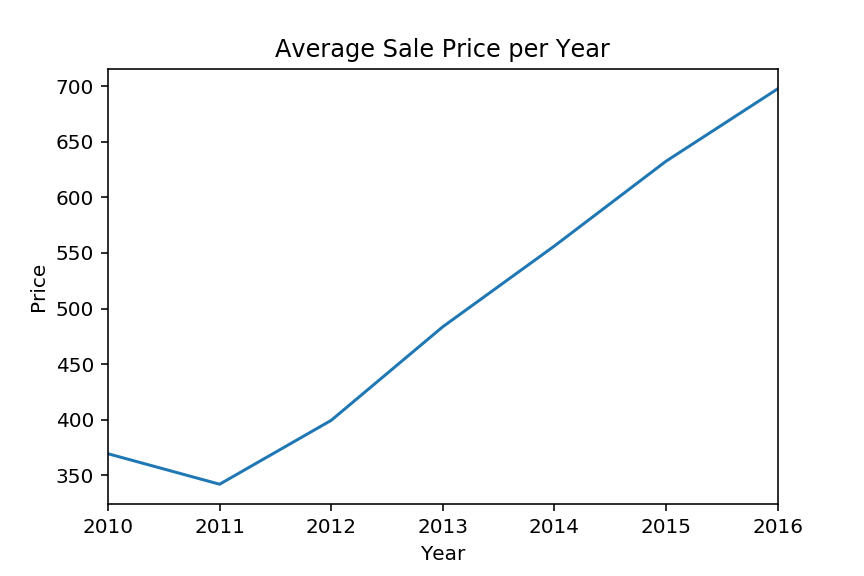
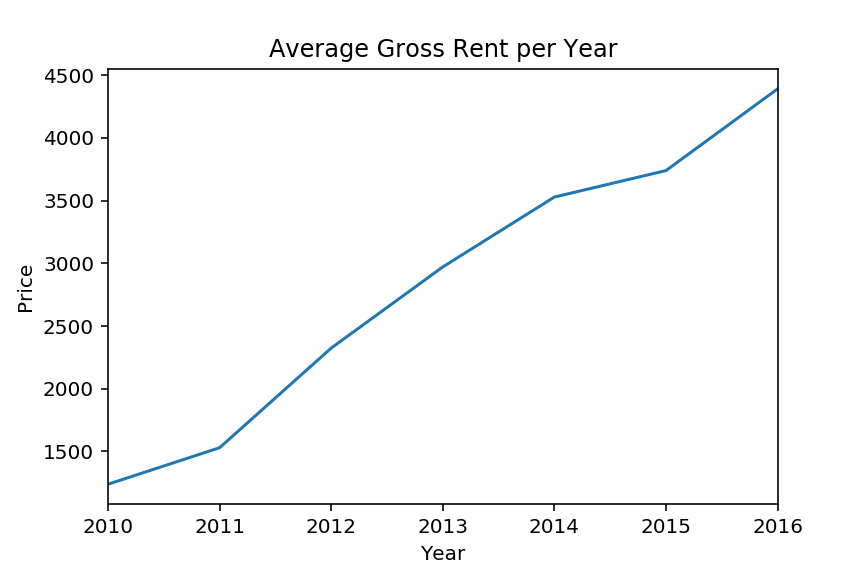
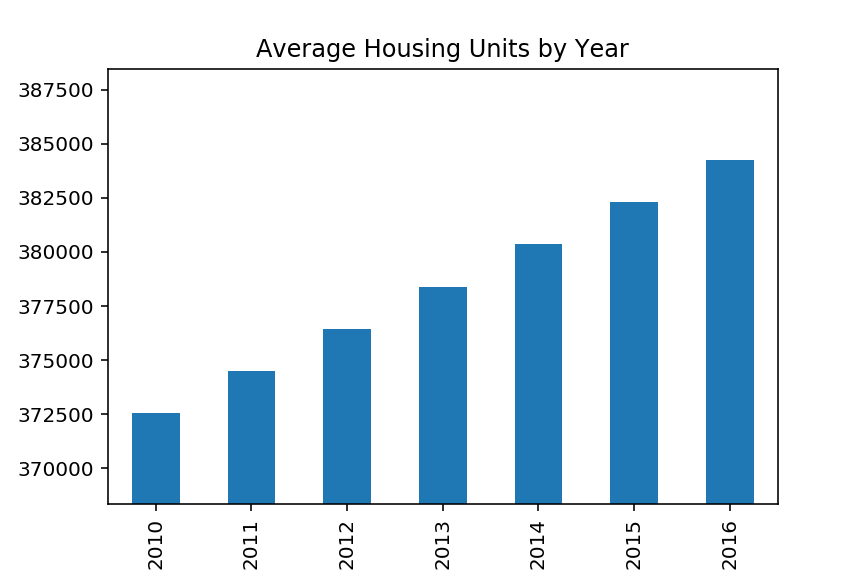

In [151]:
panel.servable()